# Netflix Userbase Exploratory Data Analysis

This notebook performs an exploratory data analysis (EDA) on the Netflix userbase dataset. We'll examine user demographics, subscription patterns, revenue metrics, and visualize key insights.

In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Preparation

In this section, we import the necessary libraries and load the dataset.

In [ ]:
# Load the Netflix userbase dataset
df = pd.read_csv("Netflix Userbase.csv")

In [ ]:
# Display the first few rows of the dataset
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


## Initial Data Exploration

Let's examine the structure and basic statistics of the dataset.

In [ ]:
# Get summary statistics for numerical columns
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [ ]:
# Get information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
# Check the number of unique values in each column
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [ ]:
# Check for missing values
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [ ]:
# Alternative check for missing values (same as isnull)
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [ ]:
# Calculate average monthly revenue by subscription type
average_revenue_by_subscription = df.groupby('Subscription Type')["Monthly Revenue"].mean()
print(average_revenue_by_subscription)

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64


## Summary Statistics and Aggregations

Let's compute some key aggregations to understand the data better.

In [ ]:
# Count the number of users per country
users_per_country = df.groupby('Country')['User ID'].count()
print(users_per_country)

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64


In [ ]:
# Calculate median age by plan duration
median_age_by_plan = df.groupby('Plan Duration')['Age'].median()
print(median_age_by_plan)

Plan Duration
1 Month    39.0
Name: Age, dtype: float64


In [ ]:
# Calculate total monthly revenue by gender
monthly_revenue_per_gender = df.groupby('Gender')['Monthly Revenue'].sum()
print(monthly_revenue_per_gender)

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64


In [ ]:
# Calculate average age by device type
avg_age_per_device = df.groupby('Device')['Age'].mean()
print(avg_age_per_device)

Device
Laptop        39.036164
Smart TV      38.693443
Smartphone    38.726248
Tablet        38.720379
Name: Age, dtype: float64


## Data Visualization

In this section, we create various plots to visualize the relationships and distributions in the data.

Age vs Monthly revenue (Colored by Gender) - Scatter Plot

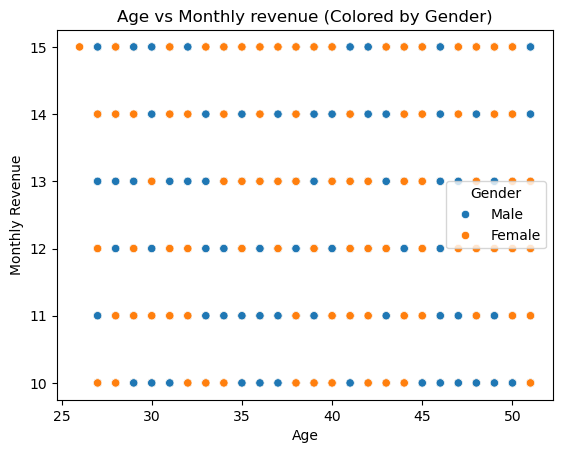

In [ ]:
# Create a scatter plot of Age vs Monthly Revenue, colored by Gender
plt.Figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Monthly Revenue", hue='Gender', data = df)
plt.title('Age vs Monthly revenue (Colored by Gender)')
plt.xlabel('Age')
plt.ylabel('Monthly Revenue')
plt.show()

Avg monthly revenue by Country - Barplot

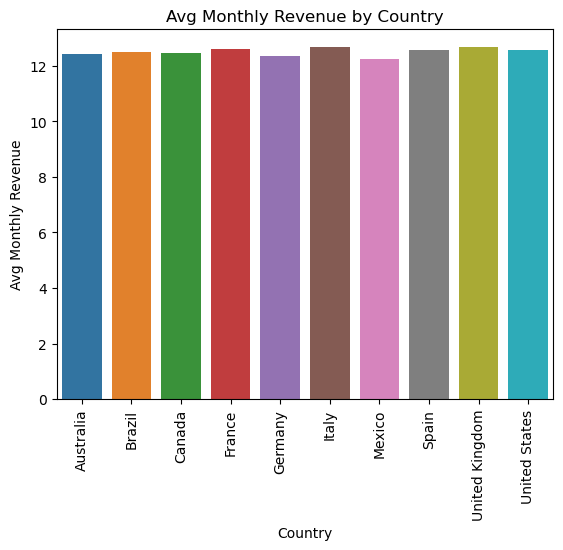

In [ ]:
# Create a bar plot of average monthly revenue by country
average_revenue_by_country = df.groupby('Country')['Monthly Revenue'].mean().reset_index()
sns.barplot(x='Country', y='Monthly Revenue', data=average_revenue_by_country, hue='Country')
plt.title('Avg Monthly Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Avg Monthly Revenue')
plt.xticks(rotation = 90)
plt.show()

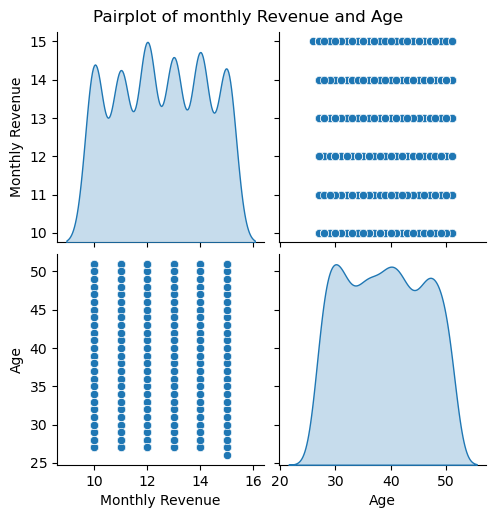

In [ ]:
# Create a pairplot for numerical columns to see relationships
numerical_columns = ['Monthly Revenue', 'Age']
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of monthly Revenue and Age', y=1.02)
plt.show()

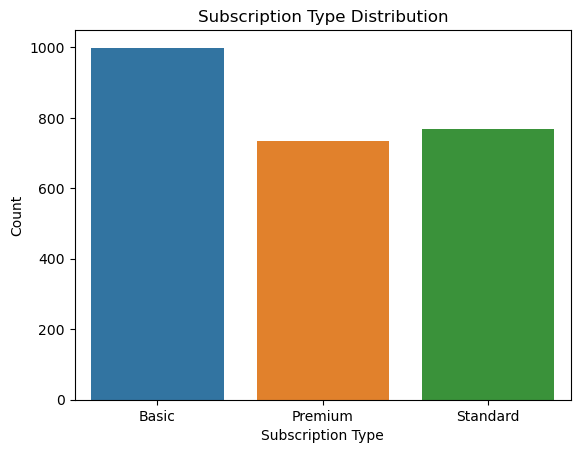

In [ ]:
# Create a count plot for subscription type distribution
sns.countplot(x= 'Subscription Type', data=df, hue='Subscription Type')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
# plt.xticks(rotation=90)
plt.show()

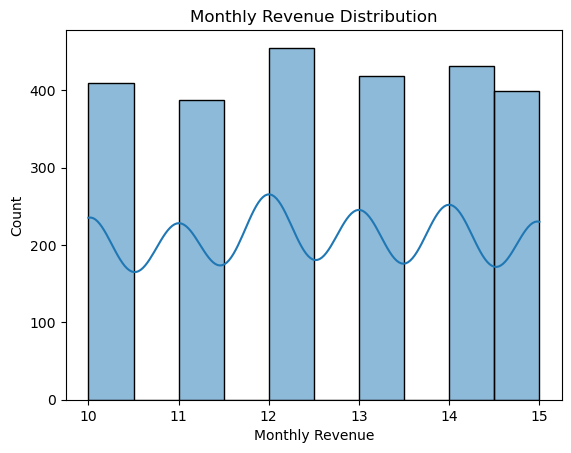

In [ ]:
# Create a histogram of monthly revenue distribution
sns.histplot(df['Monthly Revenue'], bins=10, kde=True)
plt.title('Monthly Revenue Distribution')
plt.show()

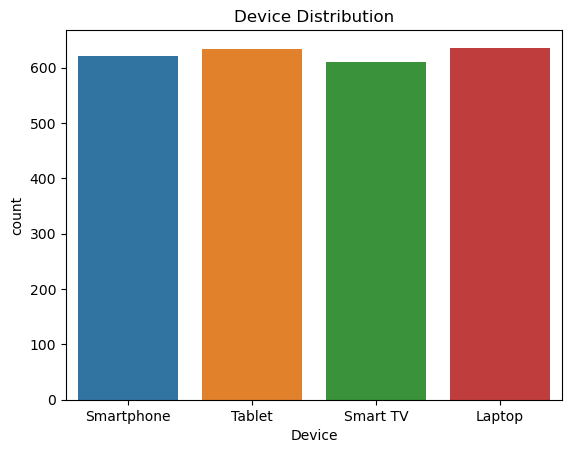

In [ ]:
# Create a count plot for device distribution
sns.countplot(x='Device', data=df, hue='Device')
plt.title('Device Distribution')
plt.show()

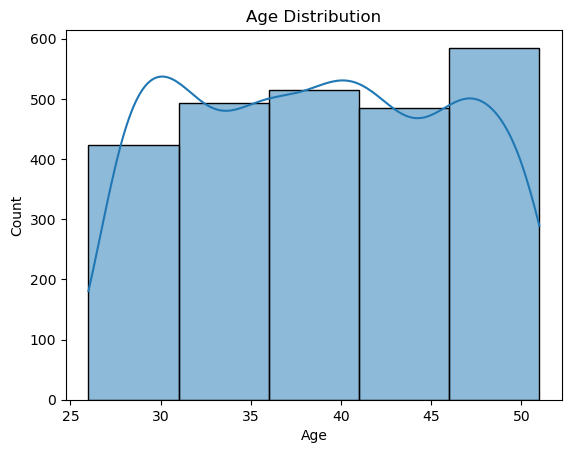

In [ ]:
# Create a histogram of age distribution
sns.histplot(df['Age'], bins=5, kde=True)
plt.title('Age Distribution')
plt.show()

## Conclusion

This exploratory data analysis provided insights into the Netflix userbase, including demographic distributions, subscription patterns, and revenue metrics. Key findings include:

- Age and revenue relationships
- Popular subscription types and devices
- Geographic distribution of users and revenue

Further analysis could involve predictive modeling or deeper statistical tests.